###  Введение

В ходе исследования мы загрузим данные (тексты песен) при помощи парсинга сайта, проведем обработку текстов, а также проанализируем тексты на совпадения. По итогу будет создано облако из наиболее часто встречающихся слов в текстах.

In [1]:
from bs4 import BeautifulSoup as bs
import requests

import matplotlib.pyplot as plt
import pandas as pd # Библиотека для работы с таблицами
import numpy as np  # Библиотека для работы с массивами и матрицами
import nltk # Библиотека для работы с текстами
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize
 # токенайзер - разбивает непрерывный текст на токены(предложения/слова)
from nltk.stem.snowball import SnowballStemmer # стеммер - преобразует тексты к начальной форме
from nltk.corpus import stopwords # список незначимых слов - я, ты, он, она, там и тд
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

from pymystem3 import Mystem

from wordcloud import WordCloud

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nlt

#### Напишем небольшую функцию- парсер для загрузки текстов песен
Будем загружать с сайта https://txt-pesen.ru тексты песен 3-х известных исполнителей: Ария, Дельфин и Наутилус Помпилиус.

In [2]:
def parser(url):
    
    response = requests.get(url, params='')
    soup = bs(response.content, 'html.parser')
    text = ''
    songs = soup.find_all('tr', class_ = 'cat-list-row0')

    for i in songs:
        page = i.find('td', class_="list-title").find('a').get('href') 
        url = 'https://txt-pesen.ru/' + str(page)
        response = requests.get(url, params='')
        soup = bs(response.content, 'html.parser')
        song = soup.find('div',itemprop="articleBody").get_text()
        song = song[:-70]
        text = text + song
    return text

        # with open('nautilus.csv', 'w') as file: # для сохранения в файл
        #     file.write(nautilus)
        
url_1 = 'https://txt-pesen.ru/russkij-rok/nautiluspompilius.html' 
url_2 = 'https://txt-pesen.ru/russkij-rok/arija.html' 
url_3 = 'https://txt-pesen.ru/russkij-rok/delfin.html' 

# url = input('Скопируйте и вставьте адрес с главной страницы исполнителя') # вариант для самостоятельного выбора пользователем
            
nautilus = parser(url_1)
aria = parser(url_2)
delfin = parser(url_3)

In [3]:
len(aria) # проверим  длину загруженной строки

67041

In [4]:
aria[-210:-1] # проверим, что загрузили на примере  группы Ария. Все верно - песня точно их;)

'.\n\r\nЯ - свободен, словно птица в небесах.\r\nЯ - свободен! Я забыл, что значит страх.\r\nЯ - свободен, с диким ветром - наравне.\r\nЯ - свободен, наяву, а не во сне.\n\r\nЯ - свободен!\r\nЯ - свободен!\r\nЯ - свободен!\n\n\n\n'

#### Обработка  текста будет происходить при помощи функции, которая  принимает на вход текст и возвращает леммы токенов предложения, фильтруя по стоп-словам и удаляя знаки пунктуации.

In [5]:
# для удаления знаков пунктуации
import string
punctuations = list(string.punctuation)

In [6]:
# set нужен для того, чтобы поиск по словам был быстрее
from nltk.corpus import stopwords
ru_stop_words = set(stopwords.words('russian'))

In [7]:
# к данному списку можно добавлять свои слова,  мешающие работе алгоритма 
stopwords_list = stopwords.words('russian')
my_stop_words = ['я','тебе','поэтому', 'припев', 'это','куплет', 'Ты','твой','...','пикник','ария','наутилус','помпилиус','песня','мой','твой', 'наш','нам ','мы:']
stopwords_list.extend(my_stop_words)

In [8]:
#  Данная функция принимает на вход текст и возвращает леммы токенов предложения, фильтруя по стоп-словам и удаляя знаки пунктуации
def text_processing(text, stopwords, punct):
    text = text.lower()
    words = wordpunct_tokenize(text) # С помощью токенизации разбиваем текст на токены 
    words = [word for word in words if word not in punct] # Удаляем знаки пунктуации
    words = [word for word in words if word not in stopwords] # Удаляем стопслова
    new_text = ','.join(words)
    mystem = Mystem()
    new_text = mystem.lemmatize(new_text) # лемматизируем текст
    return new_text

In [9]:
nautilus_lemm_text = text_processing(nautilus, stopwords_list, punctuations)
aria_lemm_text = text_processing(aria, stopwords_list, punctuations)
delfin_lemm_text = text_processing(delfin, stopwords_list, punctuations)

Проверим результат работы функции сравним длину текста до и после обработки

In [10]:
len(nautilus)

53087

In [11]:
len(nautilus_lemm_text)

11012

Как видно  функция работает - количество лишних знаков в тексте уменьшилось в 5 раз.

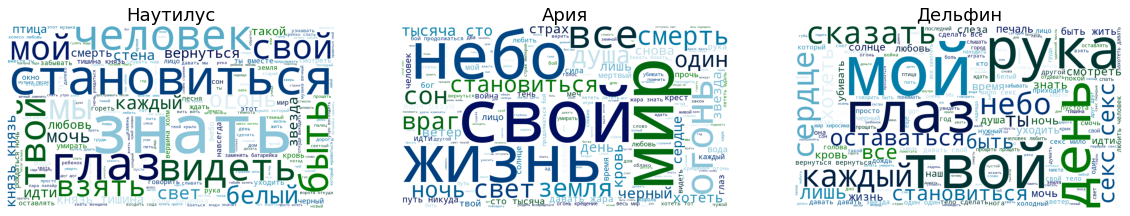

In [12]:
# посторим облаков из слов по текстам каждого исполнителя:
texts_list = [nautilus_lemm_text, aria_lemm_text, delfin_lemm_text]
all_singers = ['Наутилус','Ария', 'Дельфин']
i = 1
for name, text in zip(all_singers, texts_list):
    plt.rcParams['figure.figsize'] = (20,15)
    text_raw = " ".join(text)
    wordcloud = WordCloud(colormap='ocean', background_color='white',height =500, width = 900).generate(text_raw)
    plt.subplot(1, 3, i, label=name,frame_on=True)
    plt.tick_params(labelsize=10)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(name,fontdict={'fontsize':18,'color':'black'},y=1)
    plt.tick_params(labelsize=10)
    i += 1

Теперь посмотрим насколько отличаются тексты у данных исполнителей, для этого импортируем библиотеку difflib

In [13]:
import difflib

texts_list = [nautilus_lemm_text, aria_lemm_text, delfin_lemm_text]
all_singers = ['Наутилус','Ария', 'Дельфин']

def similarity(text1, text2):

  matcher = difflib.SequenceMatcher(None, text1, text2)
  return matcher.ratio()

for i in range(0, len(texts_list)):
    for j in range(i+1, len(texts_list)):
        if i != j:
            print('Совпадение текстов', all_singers[i], '-',all_singers[j], (similarity(texts_list[i], texts_list[j]))*100, '%')

Совпадение текстов Наутилус - Ария 0.8622016936104695 %
Совпадение текстов Наутилус - Дельфин 1.566437376557924 %
Совпадение текстов Ария - Дельфин 1.0503571214212832 %


Самое большее совпадение у текстов Наутилус - Дельфин  и оно составило 1.56 %

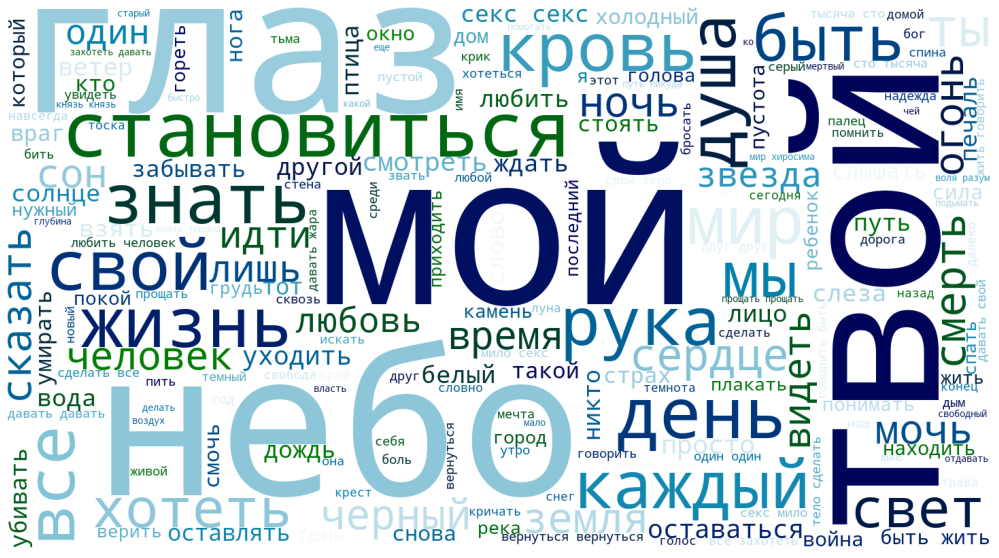

In [14]:
# Объединим данные всех исполнителей для определения наиболее часто встречающихся слов
# Построим облако слов из наиболее часто встречающихся слов у данных исполнителей:
plt.rcParams['figure.figsize'] = (20,10)
text_raw = " ".join(nautilus_lemm_text) + " ".join(aria_lemm_text) + " ".join(delfin_lemm_text)
wordcloud = WordCloud(colormap='ocean', background_color='white',height =800,
                      width = 1450).generate(text_raw)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Выводы
Код полностью работоспособен, с учётом небольших доработок в части добавления опции выбора пользователем исполнителя возможна интеграция данного кода в приложение для использования широким кругом пользователей.